# Sofi Martínez Fortis


## Radiative Processes Midterm Project
----------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as C
import pandas as pd
from astropy.io import fits

In [2]:
table = pd.read_csv('Data/interval_info.csv', index_col=0)
table

,f ratio,Line,λ_rest,λ_obs,z
M2,0.891,Mg I 5175,5175.0,5847.0,0.1299
M3,0.794,Mg I 5175,5175.0,5209.0,0.0065
P4,0.749,Hβ,4861.0,4915.0,0.0112
P5,0.667,Hγ,4340.0,4380.0,0.0091
M6,0.595,Hζ,3889.0,3902.0,0.0033


In [7]:
# SGMF: Open fits files and extract data
P1 = fits.open('Data/P1STAR.fits') # Do -- Perfect unison
M2 = fits.open('Data/M2GAL.fits') # Re -- Major 2nd
M3 = fits.open('Data/M3GAL.fits') # Mi -- Major 3rd
P4 = fits.open('Data/P4GAL.fits') # Fa -- Perfect 4th
P5 = fits.open('Data/P5GAL.fits') # Sol -- Perfect 5th
M6 = fits.open('Data/M6STAR.fits') # La -- Major 6th

types = ['STAR', 'GAL', 'GAL', 'GAL', 'GAL', 'STAR']

ints = [P1, M2, M3, P4, P5, M6]
ras = [d[0].header["PLUG_RA"] for d in ints]
decs = [d[0].header["PLUG_DEC"] for d in ints]
objname = [d[0].header["NAME"] for d in ints]

In [8]:
df = pd.DataFrame({
    'Solfege': ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La'],
    'obj name': objname,
    'obj type': types,
    'Notes': ['K5', '', 'STARFORMING','', 'STARFORMING BROADLINE', 'TAURUS STAR'],
    'RA': ras,
    'DEC': decs,
    'obj z': [-7.77044e-07, 0.129967, 0.00654167, 0.011089, 0.0091407,0.00301317],
    'target z': [0.0000, table['z'][0], table['z'][1], table['z'][2], table['z'][3], table['z'][4]]
}, index=['P1', 'M2', 'M3', 'P4', 'P5', 'P6'])

df = df.round({'obj z': 4})

/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_1131/2031804186.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'target z': [0.0000, table['z'][0], table['z'][1], table['z'][2], table['z'][3], table['z'][4]]


In [9]:
df

,Solfege,obj name,obj type,Notes,RA,DEC,obj z,target z
P1,Do,3128-54758-01,STAR,K5,340.635670,14.214130,-0.0000,0.0000
M2,Re,2878-54441-01,GAL,,22.657482,-10.015680,0.1300,0.1299
M3,Mi,0516-52010-01,GAL,STARFORMING,180.676020,1.976799,0.0065,0.0065
P4,Fa,1665-52975-01,GAL,,49.498183,41.520358,0.0111,0.0112
P5,Sol,1069-52582-01,GAL,STARFORMING BROADLINE,41.641410,-0.247160,0.0091,0.0091
P6,La,1640-53753-01,STAR,TAURUS STAR,69.534200,26.097300,0.0030,0.0033


In [10]:
loglam = [d[1].data["loglam"] for d in ints]
ll1,ll2,ll3,ll4,ll5,ll6 = loglam

# SGMF: de-log wavelengths for each object 
l1 = 10**ll1
l2 = 10**ll2
l3 = 10**ll3
l4 = 10**ll4
l5 = 10**ll5
l6 = 10**ll6
ls = [l1,l2,l3,l4,l5,l6]


# SGMF: fluxes
fluxes = [d[1].data["flux"] for d in ints]
f1,f2,f3,f4,f5,f6 = fluxes

## Full Spectra

/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_1131/1493946689.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(df["obj name"][i]+ ' ' + df["obj type"][i],
/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_1131/1493946689.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(df["obj name"][i]+ ' ' + df["obj type"][i],
/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_1131/1493946689.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). 

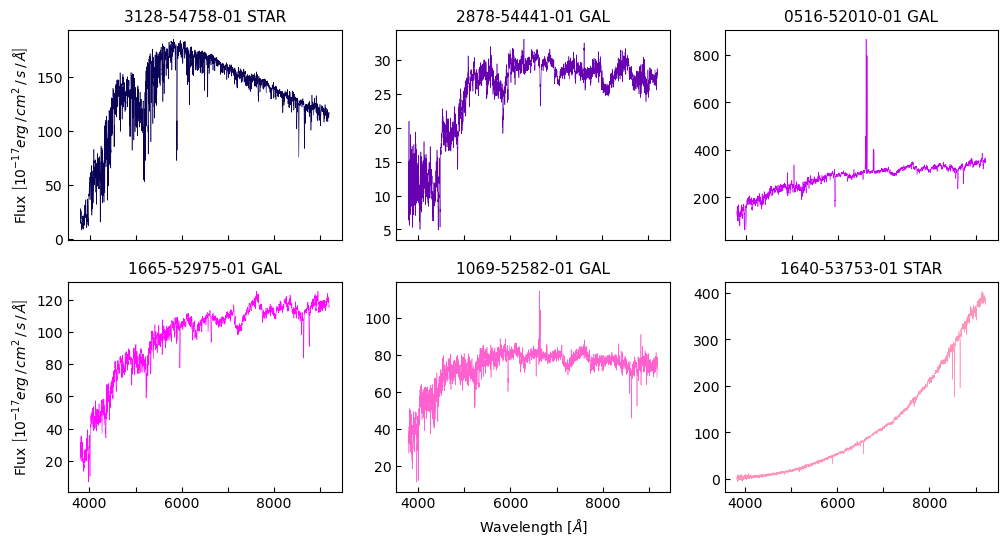

In [73]:
colors = ['#0B0356', '#6700B1', '#C703F5', '#FF09FF', '#FF60CF', '#FF93BA']

fig = plt.figure(figsize=(12,6))
for i in range(3):
    fig.add_subplot(2,3,(i+1))
    plt.tick_params('both', direction='in')
    plt.plot(ls[i], fluxes[i], color=colors[i], linewidth=0.4)
    plt.title(df["obj name"][i]+ ' ' + df["obj type"][i], 
    fontsize=11)
    plt.xticks(ticks=[4000,5000,6000,7000,8000,9000], 
    labels=['','','','','',''])
    if i==0:
        plt.ylabel(r"Flux $\left[ 10^{-17} erg\,/\,cm^{2}\,/\,s\,/\,\AA \right]$",
        fontsize=10)

for i in range(3):
    fig.add_subplot(2,3,(i+4))
    plt.tick_params('both', direction='in')
    plt.plot(ls[i+3], fluxes[i+3], color=colors[i+3], linewidth=0.4)
    plt.title(df["obj name"][i+3]+ ' ' + df["obj type"][i+3], 
    fontsize=11)
    plt.xticks(ticks=[4000,5000,6000,7000,8000,9000], 
    labels=['4000','','6000','','8000',''])
    if i==0:
        plt.ylabel(r"Flux $\left[ 10^{-17} erg\,/\,cm^{2}\,/\,s\,/\,\AA \right]$",
        fontsize=10)
    elif i==1:
        plt.xlabel(r"Wavelength $[\AA]$", fontsize=10)

plt.savefig('Plots/fullspec.png', dpi=800, bbox_inches='tight')

## Individual Line Spectra

/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_1131/378263087.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvline(table['λ_obs'][0], color=orange, ls='--', label='Mg I 5175')
/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_1131/378263087.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvline(table['λ_obs'][1], color=orange, ls='--', label='Mg I 5175')
/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_1131/378263087.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

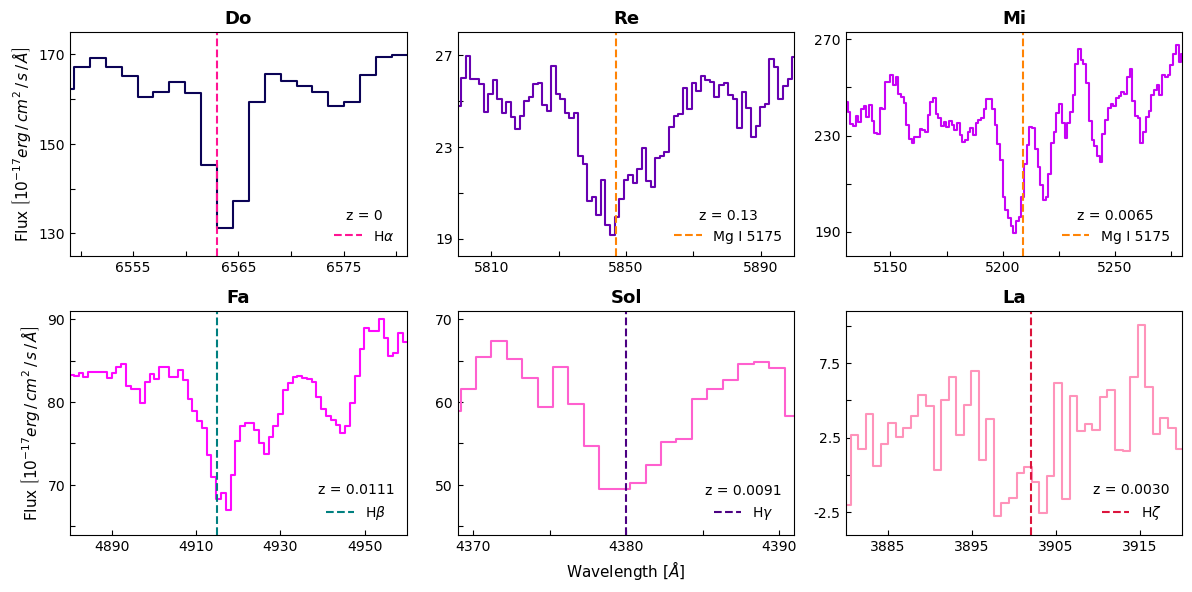

In [99]:
fig = plt.figure(figsize=(12,6))
orange = '#FF8405'

fig.add_subplot(2,3,1)
plt.step(l1,f1, color=colors[0])
plt.tick_params('both', direction='in')
plt.xticks(ticks=[6550,6555,6560,6565,6570,6575,6580], 
labels=['','6555','','6565', '', '6575', ''])
plt.yticks(ticks=[130,140,150,160,170],
labels=['130','','150','','170'])
plt.xlim(6549, 6581)
plt.ylim(125,175)
plt.axvline(6563, color='deeppink', ls='--', label=r"H$\alpha$")
plt.title('Do', fontsize=13, weight='bold')
plt.ylabel(r"Flux $\left[ 10^{-17} erg\,/\,cm^{2}\,/\,s\,/\,\AA \right]$", fontsize=11)
plt.legend(loc='lower right', title='z = 0', frameon=False)

fig.add_subplot(2,3,2)
plt.step(l2,f2, color=colors[1])
plt.tick_params('both', direction='in')
plt.xlim(5800, 5900)
plt.ylim(18.25,28)
plt.axvline(table['λ_obs'][0], color=orange, ls='--', label='Mg I 5175')
plt.xticks(ticks=[5810,5830,5850,5870,5890],
labels=['5810','','5850','','5890'])
plt.yticks(ticks=[19, 21, 23, 25, 27],
labels=['19','','23','','27'])
plt.title('Re', fontsize=13, weight='bold')
plt.legend(loc='lower right', title='z = 0.13', frameon=False)

fig.add_subplot(2,3,3)
plt.step(l3,f3, color=colors[2])
plt.tick_params('both', direction='in')
plt.xlim(5130, 5280)
plt.ylim(180,273)
plt.axvline(table['λ_obs'][1], color=orange, ls='--', label='Mg I 5175')
plt.xticks(ticks=[5150,5175,5200,5225,5250,5275],
labels=['5150','','5200','','5250',''])
plt.yticks(ticks=[190,210,230,250,270],
labels=['190','','230','','270'])
plt.title('Mi', fontsize=13, weight='bold')
plt.legend(loc='lower right', title='z = 0.0065', frameon=False)

fig.add_subplot(2,3,4)
plt.step(l4,f4, color=colors[3])
plt.tick_params('both', direction='in')
plt.xlim(4880,4960)
plt.ylim(64,91)
plt.xticks(ticks=[4890,4910,4930,4950],
labels=['4890','4910','4930','4950'])
plt.yticks(ticks=[65,70,75,80,85,90],
labels=['','70','','80','','90'])
plt.axvline(table['λ_obs'][2], color='teal', ls='--', label=r"H$\beta$")
plt.title('Fa', fontsize=13, weight='bold')
plt.ylabel(r"Flux $\left[ 10^{-17} erg\,/\,cm^{2}\,/\,s\,/\,\AA \right]$", fontsize=11)
plt.legend(loc='lower right', title='z = 0.0111', frameon=False)


fig.add_subplot(2,3,5)
plt.step(l5,f5, color=colors[4])
plt.tick_params('both', direction='in')
plt.xlim(4369,4391)
plt.ylim(44,71)
plt.axvline(table['λ_obs'][3], color='indigo', ls='--', label=r"H$\gamma$")
plt.xticks(ticks=[4370,4375,4380,4385,4390],
labels=['4370','','4380','','4390'])
plt.yticks(ticks=[45,50,55,60,65,70],
labels=['','50','','60','','70'])
plt.title('Sol', fontsize=13, weight='bold')
plt.xlabel(r"Wavelength $[\AA]$", fontsize=11)
plt.legend(loc='lower right', title='z = 0.0091', frameon=False)

fig.add_subplot(2,3,6)
plt.step(l6,f6, color=colors[5])
plt.tick_params('both', direction='in')
plt.xlim(3880,3920)
plt.ylim(-4,11)
plt.axvline(table['λ_obs'][4], color='crimson', ls='--', label=r"H$\zeta$")
plt.xticks(ticks=[3885,3895,3905,3915])
plt.yticks(ticks=[-2.5,0,2.5,5,7.5,10],
labels=['-2.5','','2.5','','7.5', ''])
plt.title('La', fontsize=13, weight='bold')
plt.legend(loc='lower right', title='z = 0.0030', frameon=False)

plt.tight_layout(pad=1)

plt.savefig('Plots/solfege.png', dpi=800, bbox_inches='tight')

## Individual Plots

Plots to overlay sheet music

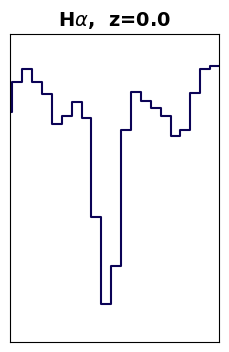

In [113]:
# Do
plt.figure(figsize=(2.7,4))
plt.step(l1,f1, color=colors[0])
plt.xlim(6549, 6581)
plt.ylim(125,175)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title(r"H$\alpha$,  z=0.0", weight='bold', fontsize=14)
plt.savefig('Plots/do.png', dpi=400, bbox_inches='tight')

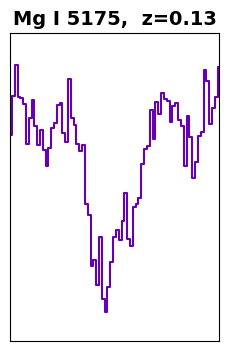

In [115]:
# Re
plt.figure(figsize=(2.7,4))
plt.step(l2,f2, color=colors[1])
plt.xlim(5800, 5900)
plt.ylim(18.25,28)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title(r"Mg I 5175,  z=0.13", weight='bold', fontsize=14)
plt.savefig('Plots/re.png', dpi=400, bbox_inches='tight')

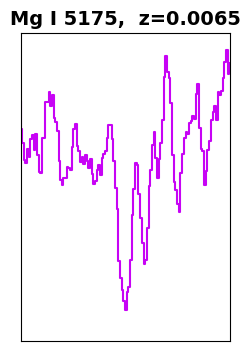

In [116]:
# Mi
plt.figure(figsize=(2.7,4))
plt.step(l3,f3, color=colors[2])
plt.xlim(5130, 5280)
plt.ylim(180,273)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title(r"Mg I 5175,  z=0.0065", weight='bold', fontsize=14)
plt.savefig('Plots/mi.png', dpi=400, bbox_inches='tight')

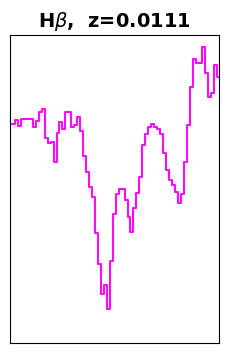

In [ ]:
# Fa
plt.figure(figsize=(2.7,4))
plt.step(l4,f4, color=colors[3])
plt.xlim(4880,4960)
plt.ylim(64,91)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title(r"H$\beta$,  z=0.0091", weight='bold', fontsize=14)
plt.savefig('Plots/fa.png', dpi=400, bbox_inches='tight')

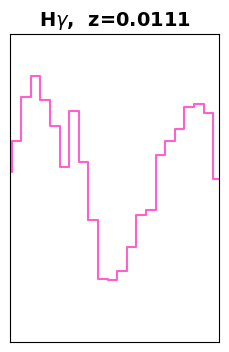

In [118]:
# Sol
plt.figure(figsize=(2.7,4))
plt.step(l5,f5, color=colors[4])
plt.xlim(4369,4391)
plt.ylim(44,71)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title(r"H$\gamma$,  z=0.0111", weight='bold', fontsize=14)
plt.savefig('Plots/sol.png', dpi=400, bbox_inches='tight')

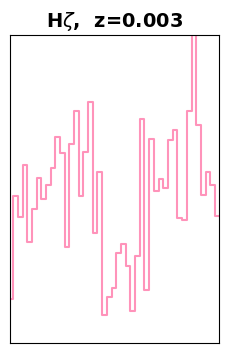

In [120]:
# La
plt.figure(figsize=(2.7,4))
plt.step(l6,f6, color=colors[5])
plt.xlim(3880,3920)
plt.ylim(-4,10)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title(r"H$\zeta$,  z=0.003", weight='bold', fontsize=14)
plt.savefig('Plots/la.png', dpi=400, bbox_inches='tight')